In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

In [9]:
# use self defined stdev function because the numpy one calculates population std
def stdev(array):
    if len(array) <= 1:
        return None
    mean = np.average(array)
    sum_array = (array - mean)**2
    return math.sqrt(sum(sum_array)/(len(array)-1))

In [13]:
# Wien’s Displacement Law
# declaring constants
theta_init = 78
const_a = 13900
const_b = 1.689
r_0 = 1.1
a_0 = 4.5 * 10**(-3)

v_arr, current_arr, peak_angle_arr = np.loadtxt('voltage_current_peak_angles.txt', skiprows=1, unpack=True)
theta_arr = theta_init - peak_angle_arr
index_refract_arr = np.sqrt(((2/np.sqrt(3)) * np.sin(np.deg2rad(theta_arr)) + 1/2)**2 + 3/4)
lambda_arr = np.sqrt(const_a / (index_refract_arr - const_b))
lambda_ave = np.mean(lambda_arr) # note that this is in nanometers
u_lambda = stdev(lambda_arr)

temperature_arr = 300 + ((v_arr/current_arr)/r_0 - 1)/a_0
temperature_ave = np.mean(temperature_arr)
u_temp = stdev(temperature_arr)

temp_lambda = temperature_ave * lambda_ave * 10**(-9)
u_temp_lambda = temp_lambda * np.sqrt((u_lambda/lambda_ave)**2 + (u_temp/temperature_ave)**2)

print('The average wavelength is', lambda_ave, '±', u_lambda, 'nm')
print('The average temperature is', temperature_ave, '±', u_temp, 'K')
print('The average value of T*lambda =', temp_lambda, '±', u_temp_lambda, 'K*m')

The average wavelength is 1093.364475920394 ± 107.64645962365645 nm
The average temperature is 2724.839439684341 ± 376.28763952003965 K
The average value of T*lambda = 0.002979242645937689 ± 0.0005052744390958888 K*m


In [4]:
# curvefit model
def linear_model(x, a, b):
    return a * x + b

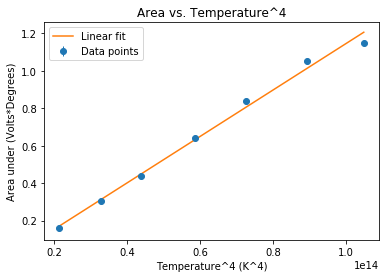

In [14]:
# Stefan-Boltzmann Law
_, area_arr = np.loadtxt('voltage_area.txt', skiprows=1, unpack=True)

# use curvefit to determine the relationship between power and temperature^4
# uncertainty here is an estimate of how the imprecission our judgement of where the start and end is effect the area
p_opt, p_cov = curve_fit(linear_model, temperature_arr**4, area_arr, 
                             sigma=np.array([0.01] * len(area_arr)), absolute_sigma=True)

a = p_opt[0]
b = p_opt[1]
pvar = np.diag(p_cov)
stdev = np.sqrt(pvar)

y = linear_model(temperature_arr**4, a, b)

plt.errorbar(temperature_arr**4, area_arr, yerr=np.array([0.01] * len(area_arr)), ls='', marker='o', lw=1, label="Data points")
plt.plot(temperature_arr**4, y, label='Linear fit')
plt.title('Area vs. Temperature^4')
plt.xlabel('Temperature^4 (K^4)')
plt.ylabel('Area under (Volts*Degrees)')
plt.legend()

In [6]:
# goodness of fit
upper_n = len(area_arr) # number of datapoints taken
lower_n = 2
degrees_of_freedom = upper_n - lower_n

# ommiting the first point in the data
chi_squared = (1 / degrees_of_freedom) * sum(((area_arr - y)/ np.array([0.01] * len(area_arr)))**2)

print('The chi squared value we got is', chi_squared)

The chi squared value we got is 13.09163851454133
